In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

## Kodowanie zdań

In [8]:
from datasets import wikiset
wikiset.get_raw_lines(wikiset.get(),'data/4074782')

d:\misc\projects\python\magister\data\wiki_727K.tar.bz2 found: True
d:\misc\projects\python\magister\data\wiki_test_50.tar.bz2 found: True
['data/111174', 'data/2640796', 'data/2917712', 'data/10037144', 'data/2952485', 'data/3275069', 'data/6146176', 'data/6544206', 'data/1928841', 'data/12720971', 'data/28187', 'data/7445232', 'data/109461', 'data/7674758', 'data/1198312', 'data/3384438', 'data/2025011', 'data/988580', 'data/149766', 'data/599217', 'data/3881783', 'data/2842974', 'data/31444', 'data/1057453', 'data/1276536', 'data/338825', 'data/9652769', 'data/582816', 'data/961796', 'data/1064845', 'data/380143', 'data/5160544', 'data/7150404', 'data/9387798', 'data/2651177', 'data/7370490', 'data/44426', 'data/6261767', 'data/426889', 'data/6540154', 'data/10648433', 'data/123319', 'data/4074782', 'data/32431', 'data/910628', 'data/8718322', 'data/751683', 'data/2070518', 'data/4823815', 'data/3475652']


['========,1,preface.\n',
 'IceRocket is an Internet search engine which specializes in real-time search.\n',
 'Based in Dallas, Texas, it launched in 2004 hoping to market itself solely through word of mouth.\n',
 'IceRocket is backed by Mark Cuban and headquartered in Dallas, Texas.\n',
 'The company has received angel funding from Mr. Cuban.\n',
 '========,2,History and growth.\n',
 'Icerocket launched in 2004.\n',
 'The search engine originally launched with features designed to make web searches on a PDA much easier, for instance allowing users to email a query to the engine and receive their results back in response.\n',
 'Icerocket had an early licensing deal with Gofish.com In August 2011, it was announced that IceRocket had been acquired by the Meltwater Group.\n',
 '========,2,Service.\n',
 'IceRocket is generally for blog searches but has expanded into searching the popular social networking websites Twitter and Facebook as well as allowing searching of news and the world wi

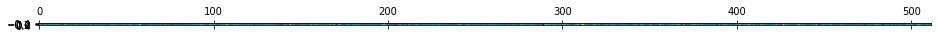

In [1]:
import numpy as np
from datasets import EmbeddedDataset
from algorithms import segments
import matplotlib.pyplot as plt
with EmbeddedDataset('wiki_segments.npz') as ds:
    Embs = ds[ds.get_embeddings()[-3:-1]]

#plt.matshow(Embs[0])
u =np.sum(Embs[0],0)
u = u/np.sqrt(u.dot(u.T))

plt.matshow([u])




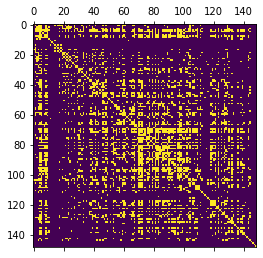

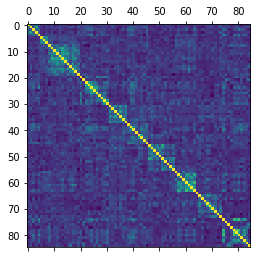

In [3]:
with EmbeddedDataset('wiki_segments.npz') as ds:
    wemb = ds[ds.get_embeddings()[-1]]
with EmbeddedDataset('choi_segments.npz') as ds:
    cemb = ds[ds.get_embeddings()[-1]]
wemb_mat = np.inner(wemb,wemb)
cemb_mat = np.inner(cemb,cemb)
plt.matshow(wemb_mat > 0.4)
plt.matshow(cemb_mat)

# Metody segmentacji


Evaluating:[..........][300/300] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][300/300] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][300/300] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
[0.48237503 0.47596323 0.49224288]


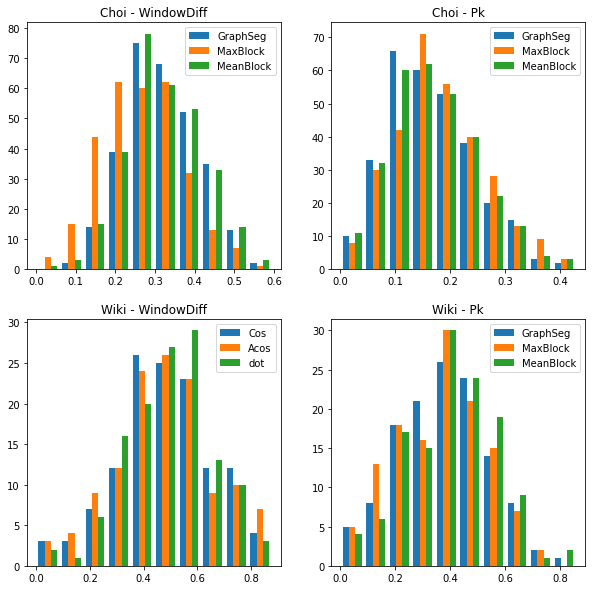

In [11]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
gs = block_comparison.with_params(block_mode='mean',cmp_mode='cos')
mbs = block_comparison.with_params(block_mode='max',cmp_mode='cos')
sbs = block_comparison.with_params(block_mode='mean',cmp_mode='acos')

with EmbeddedDataset('choi_segments.npz') as ds:
    p1,w1 = evaluate_segmenter(ds,gs,4)
    p2,w2 = evaluate_segmenter(ds,mbs,4)
    p3,w3 = evaluate_segmenter(ds,sbs,4)

    ax = plt.subplot(2,2,1)
    ax.title.set_text("Choi - WindowDiff")
    plt.hist([w1,w2,w3], label = ["GraphSeg", "MaxBlock", "MeanBlock"])
    plt.legend()

    ax = plt.subplot(2,2,2)
    ax.title.set_text("Choi - Pk")
    plt.hist([p1,p2,p3], label = ["GraphSeg", "MaxBlock", "MeanBlock"])
    plt.legend()



gs = block_comparison.with_params(block_mode='max',cmp_mode='cos',whiten=True)
sbs = block_comparison.with_params(block_mode='max',cmp_mode='acos',whiten=True)
sbs = block_comparison.with_params(block_mode='max',cmp_mode='dot',whiten=True)
with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    p1,w1 = evaluate_segmenter(ds,gs,4)
    p2,w2 = evaluate_segmenter(ds,mbs,4)
    p3,w3 = evaluate_segmenter(ds,sbs,4)
    ax = plt.subplot(2,2,3)
    ax.title.set_text("Wiki - WindowDiff")
    plt.hist([w1,w2,w3], label = ["Cos", "Acos", "dot"])
    plt.legend()

    ax = plt.subplot(2,2,4)
    ax.title.set_text("Wiki - Pk")
    plt.hist([p1,p2,p3], label = ["GraphSeg", "MaxBlock", "MeanBlock"])
    plt.legend()


